In [1]:
import kaggle

OSError: ignored

In [0]:
! mkdir -p /root/.kaggle
! mv kaggle.json /root/.kaggle

In [13]:
! ls -lA /root/.kaggle

total 4
-rw-r--r-- 1 root root 63 Mar  7 16:27 kaggle.json


In [14]:
import kaggle

In [15]:
!kaggle competitions download -c dogs-vs-cats

 97% 528M/543M [00:03<00:00, 176MB/s]
100% 543M/543M [00:03<00:00, 162MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 64.5MB/s]
 98% 265M/271M [00:01<00:00, 195MB/s]
100% 271M/271M [00:01<00:00, 194MB/s]


In [0]:
!unzip -q train.zip

In [17]:
!ls train

cat.0.jpg      cat.3250.jpg  cat.7751.jpg   dog.12250.jpg  dog.5500.jpg
cat.10000.jpg  cat.3251.jpg  cat.7752.jpg   dog.12251.jpg  dog.5501.jpg
cat.10001.jpg  cat.3252.jpg  cat.7753.jpg   dog.12252.jpg  dog.5502.jpg
cat.10002.jpg  cat.3253.jpg  cat.7754.jpg   dog.12253.jpg  dog.5503.jpg
cat.10003.jpg  cat.3254.jpg  cat.7755.jpg   dog.12254.jpg  dog.5504.jpg
cat.10004.jpg  cat.3255.jpg  cat.7756.jpg   dog.12255.jpg  dog.5505.jpg
cat.10005.jpg  cat.3256.jpg  cat.7757.jpg   dog.12256.jpg  dog.5506.jpg
cat.10006.jpg  cat.3257.jpg  cat.7758.jpg   dog.12257.jpg  dog.5507.jpg
cat.10007.jpg  cat.3258.jpg  cat.7759.jpg   dog.12258.jpg  dog.5508.jpg
cat.10008.jpg  cat.3259.jpg  cat.775.jpg    dog.12259.jpg  dog.5509.jpg
cat.10009.jpg  cat.325.jpg   cat.7760.jpg   dog.1225.jpg   dog.550.jpg
cat.1000.jpg   cat.3260.jpg  cat.7761.jpg   dog.12260.jpg  dog.5510.jpg
cat.10010.jpg  cat.3261.jpg  cat.7762.jpg   dog.12261.jpg  dog.5511.jpg
cat.10011.jpg  cat.3262.jpg  cat.7763.jpg   dog.12262.jpg  dog.55

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

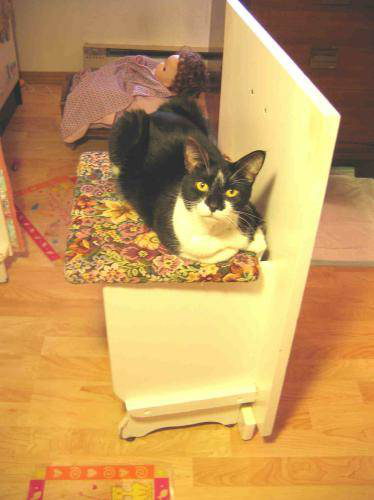

In [19]:
Image.open("./train/cat.7750.jpg")

In [20]:
cv2.imread("./train/cat.7750.jpg").shape

(500, 374, 3)

In [21]:
cv2.imread("./train/dog.12245.jpg").shape


(499, 377, 3)

In [0]:
img1=cv2.imread("./train/dog.12245.jpg")

In [23]:
img1.shape

(499, 377, 3)

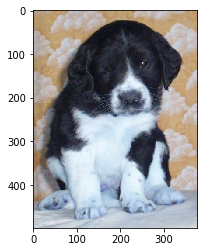

In [24]:
plt.imshow(img1)

In [0]:
#resizing the image to achieve  the same size for all the images
img2=cv2.resize(img1,(300,300))

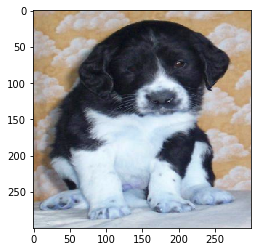

In [26]:
plt.imshow(img2)

In [0]:
import os

In [28]:
os.listdir("./train")

['cat.3930.jpg',
 'dog.6800.jpg',
 'dog.6749.jpg',
 'dog.6589.jpg',
 'dog.5597.jpg',
 'dog.1642.jpg',
 'dog.8309.jpg',
 'dog.11057.jpg',
 'cat.903.jpg',
 'dog.2479.jpg',
 'cat.7560.jpg',
 'cat.160.jpg',
 'cat.1771.jpg',
 'dog.2195.jpg',
 'cat.6238.jpg',
 'cat.4878.jpg',
 'cat.10982.jpg',
 'dog.8198.jpg',
 'cat.11781.jpg',
 'cat.5833.jpg',
 'cat.8011.jpg',
 'dog.6562.jpg',
 'dog.628.jpg',
 'cat.6006.jpg',
 'cat.8127.jpg',
 'cat.4210.jpg',
 'cat.5749.jpg',
 'dog.6216.jpg',
 'dog.4362.jpg',
 'dog.3832.jpg',
 'dog.142.jpg',
 'cat.4822.jpg',
 'cat.514.jpg',
 'cat.1987.jpg',
 'cat.11771.jpg',
 'cat.7837.jpg',
 'cat.10091.jpg',
 'cat.11111.jpg',
 'cat.8103.jpg',
 'dog.4714.jpg',
 'dog.1993.jpg',
 'cat.6320.jpg',
 'cat.4964.jpg',
 'dog.606.jpg',
 'cat.3849.jpg',
 'dog.1076.jpg',
 'dog.2170.jpg',
 'dog.12415.jpg',
 'dog.3928.jpg',
 'dog.5270.jpg',
 'dog.10848.jpg',
 'dog.12424.jpg',
 'cat.5322.jpg',
 'dog.6546.jpg',
 'cat.10419.jpg',
 'dog.10835.jpg',
 'dog.6849.jpg',
 'cat.2793.jpg',
 'dog.655

In [0]:
#sizing all the files using for loop and preparing input and output
#simple models are in to sequntials
#complex models into functional
image_list=[]
label_list=[]
for file in os.listdir("./train"):
  #print(file)
  if file.startswith("dog"):
    label_list.append("dog")
  else:
    label_list.append("cat")

  img=cv2.imread("./train/"+file)
  img=cv2.resize(img,(300,300))
  image_list.append(img)

In [30]:
len(image_list),len(label_list)

(25000, 25000)

In [0]:
X=np.array(image_list)

In [34]:
X.shape

(25000, 300, 300, 3)

In [0]:
#suffle data to devide it into train and test
from sklearn.model_selection import train_test_split




In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,label_list,test_size=0.2,shuffle=True)

In [38]:
x_train.shape,x_test.shape

((20000, 300, 300, 3), (5000, 300, 300, 3))

In [39]:
len(y_train), len(y_test)

(20000, 5000)